<a href="https://colab.research.google.com/github/mannmoshe/deep-learning/blob/main/medicine_imaging_project/medicine_imaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [19]:
import pathlib
import imageio
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [7]:
# Glob the training data and load a single image path
training_paths = pathlib.Path('/content/gdrive/MyDrive/M.sc Data Mining/Medicine imaging/data').glob('01/*.jpeg')
training_sorted = sorted([x for x in training_paths])

In [9]:
training_sorted[:5]

[PosixPath('/content/gdrive/MyDrive/M.sc Data Mining/Medicine imaging/data/01/01.jpeg'),
 PosixPath('/content/gdrive/MyDrive/M.sc Data Mining/Medicine imaging/data/01/010.jpeg'),
 PosixPath('/content/gdrive/MyDrive/M.sc Data Mining/Medicine imaging/data/01/011.jpeg'),
 PosixPath('/content/gdrive/MyDrive/M.sc Data Mining/Medicine imaging/data/01/012.jpeg'),
 PosixPath('/content/gdrive/MyDrive/M.sc Data Mining/Medicine imaging/data/01/013.jpeg')]

In [11]:
im = imageio.imread(training_sorted[0])

<ipython-input-11-abd02c7cdc1f>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(training_sorted[0])


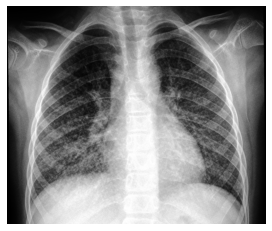

In [20]:
plt.imshow(im)
plt.axis("off")
plt.show()

In [12]:
im.shape

(1333, 1582, 3)

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
<br>
https://stackoverflow.com/questions/68909603/how-do-i-load-image-dataset-from-google-drive-to-google-colab-so-that-id-train <br>
https://datascience.stackexchange.com/questions/51671/keras-flow-from-directory-returns-0-images

In [14]:
datagen = ImageDataGenerator(rescale=1./255)

In [16]:
generator = datagen.flow_from_directory(
            '/content/gdrive/MyDrive/M.sc Data Mining/Medicine imaging/data',
            target_size=(150, 150),
            batch_size=32,
            class_mode='binary')

Found 251 images belonging to 3 classes.


In [17]:
filenames = generator.filenames

In [18]:
filenames[:5]

['01/01.jpeg', '01/010.jpeg', '01/011.jpeg', '01/012.jpeg', '01/013.jpeg']